In [2]:
import numpy as num
import pandas as pan
import matplotlib.pyplot as plp
import seaborn as sea
from datetime import datetime
%matplotlib inline

In [3]:
coronga = pan.read_csv('owid-covid-data.csv')

In [9]:
coronga.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83


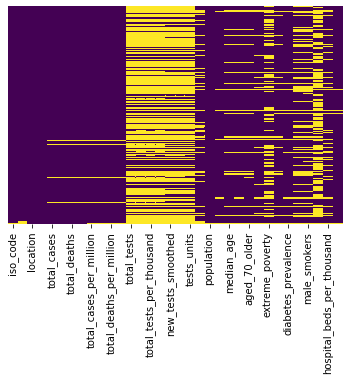

In [4]:
sea.heatmap(coronga.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
coronga.fillna(0,inplace=True)

In [4]:
coronga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27810 entries, 0 to 27809
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         27746 non-null  object 
 1   continent                        27560 non-null  object 
 2   location                         27810 non-null  object 
 3   date                             27810 non-null  object 
 4   total_cases                      27586 non-null  float64
 5   new_cases                        27586 non-null  float64
 6   total_deaths                     27586 non-null  float64
 7   new_deaths                       27586 non-null  float64
 8   total_cases_per_million          27522 non-null  float64
 9   new_cases_per_million            27522 non-null  float64
 10  total_deaths_per_million         27522 non-null  float64
 11  new_deaths_per_million           27522 non-null  float64
 12  total_tests       

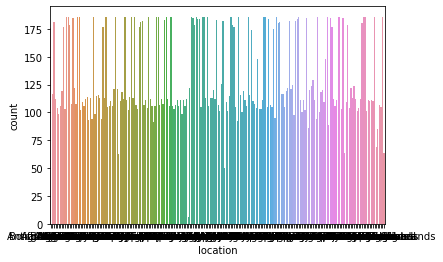

In [10]:
sea.countplot(x='location',data=coronga)

In [23]:
#coronga.dropna(inplace=True)

In [8]:
continent = pan.get_dummies(coronga['continent'],drop_first = True)

In [9]:
location = pan.get_dummies(coronga['location'],drop_first = True)
test_unit = pan.get_dummies(coronga['tests_units'],drop_first = True)

In [10]:
coronga.drop(['continent','location','date','tests_units'],axis=1,inplace=True)

In [11]:
del coronga['iso_code']

In [12]:
coronga = pan.concat([coronga,continent,location,test_unit],axis=1)

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test, y_train, y_test = train_test_split(coronga.drop('total_cases',axis=1),coronga['total_cases'],test_size=0.3)

In [16]:
mod = LogisticRegression(max_iter=99999)

In [ ]:
mod.fit(x_train,y_train)

In [ ]:
predict = mod.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

In [157]:
print(classification_report(y_test,predict))

NameError: name 'classification_report' is not defined

In [158]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(y_test,predict))